# Análise dos modelos com o Cenário 3

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plot_metric.functions import BinaryClassification
from sklearn.model_selection import GridSearchCV

## Cenário 3

In [2]:
data3_200 = pd.read_csv('Cenario3_200000.csv')
data3_200.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,classe_economica_familiar,responsavel_renda_familiar,maior_idade,nome_igual_bureau,nome_mae_igual_bureau,cpf_ativo,score_similaridade_nome,score_similaridade_nome_mae,score_fraude_maior_ponto_corte,foto_semelhante_documento,conta,cartao,fatura_atraso,nome_negativado,fraude
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),Classe média,0,1,0,0,1,1,1,0,1,1,1,0,0,0
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe média,1,1,0,1,1,1,1,0,1,1,1,0,0,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe baixa,0,1,1,1,1,1,1,0,1,1,1,0,0,0
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),Classe baixa,1,1,1,0,1,1,1,1,1,1,1,0,0,0
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),Classe baixa,1,1,0,1,1,1,1,0,1,1,1,1,1,0


In [3]:
data3_100 = pd.read_csv('Cenario3_100000.csv')
data3_100.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,classe_economica_familiar,responsavel_renda_familiar,maior_idade,nome_igual_bureau,nome_mae_igual_bureau,cpf_ativo,score_similaridade_nome,score_similaridade_nome_mae,score_fraude_maior_ponto_corte,foto_semelhante_documento,conta,cartao,fatura_atraso,nome_negativado,fraude
0,Feminino,Sem instrução e ensino fundamental incompleto,Adulto (de 20 à 59 anos),Solteiro(a),Classe baixa,1,1,0,0,1,1,1,0,1,1,1,0,0,0
1,Masculino,Ensino superior completo,Adulto (de 20 à 59 anos),Casado(a),Classe média,1,1,1,0,1,1,1,0,1,0,0,0,0,0
2,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),Classe média,1,1,1,0,1,1,1,0,1,1,1,1,1,0
3,Masculino,Sem instrução e ensino fundamental incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe baixa,0,1,1,1,1,1,1,0,1,1,1,0,0,0
4,Feminino,Sem instrução e ensino fundamental incompleto,Adulto (de 20 à 59 anos),Solteiro(a),Classe baixa,1,1,0,1,1,1,1,0,0,1,1,0,0,0


In [4]:
data3_50 = pd.read_csv('Cenario3_50000.csv')
data3_50.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,classe_economica_familiar,responsavel_renda_familiar,maior_idade,nome_igual_bureau,nome_mae_igual_bureau,cpf_ativo,score_similaridade_nome,score_similaridade_nome_mae,score_fraude_maior_ponto_corte,foto_semelhante_documento,conta,cartao,fatura_atraso,nome_negativado,fraude
0,Masculino,Sem instrução e ensino fundamental incompleto,Adulto (de 20 à 59 anos),Solteiro(a),Elite,1,1,1,0,1,1,1,0,1,1,1,0,0,0
1,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe média,1,1,1,1,1,1,1,0,1,1,0,0,0,0
2,Feminino,Ensino médio completo e superior incompleto,Jovem (até 19 anos),Solteiro(a),Classe média,1,1,0,0,1,1,1,0,1,1,1,0,0,0
3,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Divorciado(a),Classe média,1,1,1,0,1,1,1,0,1,1,1,0,0,0
4,Masculino,Ensino fundamental completo e médio incompleto,Jovem (até 19 anos),Solteiro(a),Classe baixa,0,1,0,1,1,1,0,0,1,1,1,0,0,0


In [5]:
data3_200 = pd.get_dummies(data3_200, drop_first=True)
# Alterando o nome das variáveis 
data3_200 = data3_200.rename(columns={'estado_civil_Divorciado(a)': 'estado_civil_divorciado','estado_civil_Solteiro(a)':'estado_civil_solteiro', 
                    'estado_civil_Viúvo(a)': 'estado_civil_viuvo', 'classe_economica_familiar_Elite':'classe_economica_familiar_elite',
                    'classe_economica_familiar_Classe média':'classe_economica_familiar_classe_media','sexo_Masculino': 'sexo_masculino',
                    'faixa_etaria_Idoso (acima de 60 anos)':'faixa_etaria_idoso','faixa_etaria_Jovem (até 19 anos)':'faixa_etaria_jovem',
                    'nivel_escolaridade_Ensino médio completo e superior incompleto':'nivel_escolaridade_medio_completo_sup_incompleto',
                    'nivel_escolaridade_Sem instrução e ensino fundamental incompleto':'nivel_escolaridade_sem_instrucao_fund_incompleto',
                    'nivel_escolaridade_Ensino superior completo':'nivel_escolaridade_sup_completo'})
data3_200['fraude'] = data3_200['fraude'].astype('category')

data3_100 = pd.get_dummies(data3_100, drop_first=True)
# Alterando o nome das variáveis 
data3_100 = data3_100.rename(columns={'estado_civil_Divorciado(a)': 'estado_civil_divorciado','estado_civil_Solteiro(a)':'estado_civil_solteiro', 
                    'estado_civil_Viúvo(a)': 'estado_civil_viuvo', 'classe_economica_familiar_Elite':'classe_economica_familiar_elite',
                    'classe_economica_familiar_Classe média':'classe_economica_familiar_classe_media','sexo_Masculino': 'sexo_masculino',
                    'faixa_etaria_Idoso (acima de 60 anos)':'faixa_etaria_idoso','faixa_etaria_Jovem (até 19 anos)':'faixa_etaria_jovem',
                    'nivel_escolaridade_Ensino médio completo e superior incompleto':'nivel_escolaridade_medio_completo_sup_incompleto',
                    'nivel_escolaridade_Sem instrução e ensino fundamental incompleto':'nivel_escolaridade_sem_instrucao_fund_incompleto',
                    'nivel_escolaridade_Ensino superior completo':'nivel_escolaridade_sup_completo'})
data3_100['fraude'] = data3_100['fraude'].astype('category')

data3_50 = pd.get_dummies(data3_50, drop_first=True)
# Alterando o nome das variáveis 
data3_50 = data3_50.rename(columns={'estado_civil_Divorciado(a)': 'estado_civil_divorciado','estado_civil_Solteiro(a)':'estado_civil_solteiro', 
                    'estado_civil_Viúvo(a)': 'estado_civil_viuvo', 'classe_economica_familiar_Elite':'classe_economica_familiar_elite',
                    'classe_economica_familiar_Classe média':'classe_economica_familiar_classe_media','sexo_Masculino': 'sexo_masculino',
                    'faixa_etaria_Idoso (acima de 60 anos)':'faixa_etaria_idoso','faixa_etaria_Jovem (até 19 anos)':'faixa_etaria_jovem',
                    'nivel_escolaridade_Ensino médio completo e superior incompleto':'nivel_escolaridade_medio_completo_sup_incompleto',
                    'nivel_escolaridade_Sem instrução e ensino fundamental incompleto':'nivel_escolaridade_sem_instrucao_fund_incompleto',
                    'nivel_escolaridade_Ensino superior completo':'nivel_escolaridade_sup_completo'})
data3_50['fraude'] = data3_50['fraude'].astype('category')

In [6]:
data3_50.head()

,responsavel_renda_familiar,maior_idade,nome_igual_bureau,nome_mae_igual_bureau,cpf_ativo,score_similaridade_nome,score_similaridade_nome_mae,score_fraude_maior_ponto_corte,foto_semelhante_documento,conta,...,nivel_escolaridade_medio_completo_sup_incompleto,nivel_escolaridade_sup_completo,nivel_escolaridade_sem_instrucao_fund_incompleto,faixa_etaria_idoso,faixa_etaria_jovem,estado_civil_divorciado,estado_civil_solteiro,estado_civil_viuvo,classe_economica_familiar_classe_media,classe_economica_familiar_elite
0,1,1,1,0,1,1,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
1,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,1,1,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0
3,1,1,1,0,1,1,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0


### n = 200.000

###### Dividindo a base em treino e teste

In [7]:
np.random.seed(71)
X2_train, X2_test, y2_train, y2_test = train_test_split(data3_200.drop('fraude',axis=1),data3_200['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X2_train.shape,X2_test.shape

((140000, 24), (60000, 24))

#### Árvore de Decisão

In [8]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X2_train,y2_train)

In [9]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X2_train,y2_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.5min finished


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=0)

In [10]:
# Melhor modelo encontrado
clf2 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf2 = clf2.fit(X2_train,y2_train)

# Verificando as classificações feitas na base teste
y2_pred = clf2.predict(X2_test)

###### Variaveis mais importantes

No handles with labels found to put in legend.


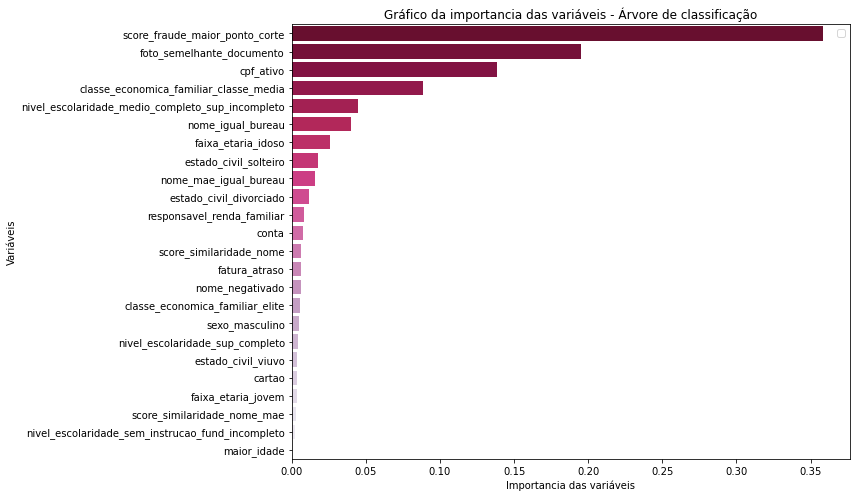

In [11]:
feature_imp = pd.Series(clf2.feature_importances_,index=data3_200.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de classificação")
plt.legend()
plt.show()

#### Floresta Aleatória

In [12]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X2_train,y2_train) 

RandomForestClassifier(random_state=0)

In [13]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X2_train,y2_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 16.4min finished


RandomForestClassifier(max_depth=8, n_estimators=500, random_state=0)

In [14]:
# Melhor modelo encontrado
rfc2 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc2 = rfc2.fit(X2_train,y2_train)

# Verificando as classificações feitas na base teste
y2_pred_rf = rfc2.predict(X2_test)

###### Variaveis mais importantes

No handles with labels found to put in legend.


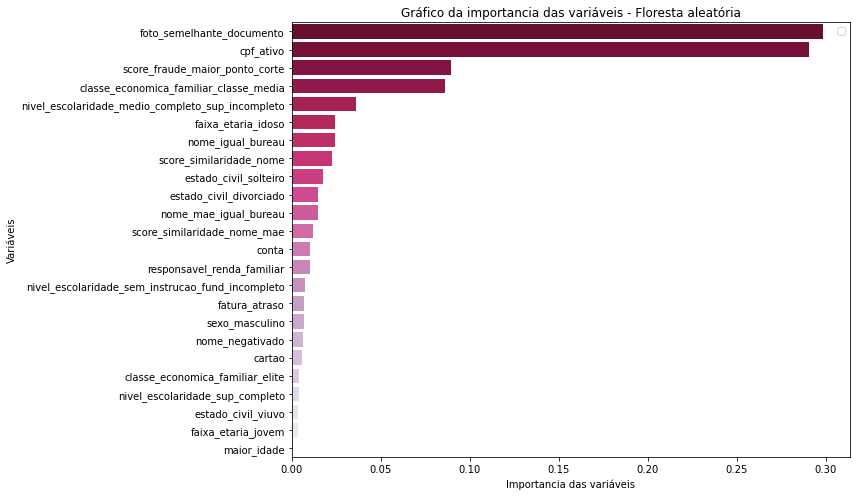

In [15]:
feature_imp = pd.Series(rfc2.feature_importances_,index=data3_200.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta aleatória")
plt.legend()
plt.show()

#### Comparação das duas tecnicas 

In [16]:
# Função que calcula as métricas
def metricas(sS, fS, sF, fF):
    N = sS + fS + sF + fF
    s = sF + sS
    S = fS + sS
    f = fS + fF
    F = sF + fF
    CAT = (sS + fF)/ N
    CAS = sS/S
    CAF = fF/F
    VPP = sS/s
    VPN = fS/f
    PVL = S/N
    MCC = (sS*fF - sF*fS)/np.sqrt(s*S*f*F)
    print("CAT = ",round(CAT,3))
    print("CAS = ",round(CAS,3))
    print("CAF = ",round(CAF,3))
    print("VPP = ",round(VPP,3))
    print("VPN = ",round(VPN,3))
    print("PVL = ",round(PVL,3))
    print("MCC = ",round(MCC,3))

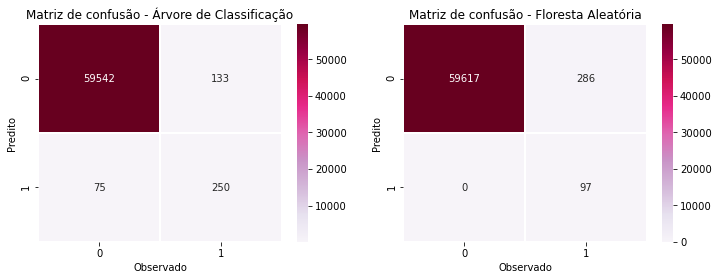

In [17]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix2 = pd.crosstab(y2_pred, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix2, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix2_rf = pd.crosstab(y2_pred_rf, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix2_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

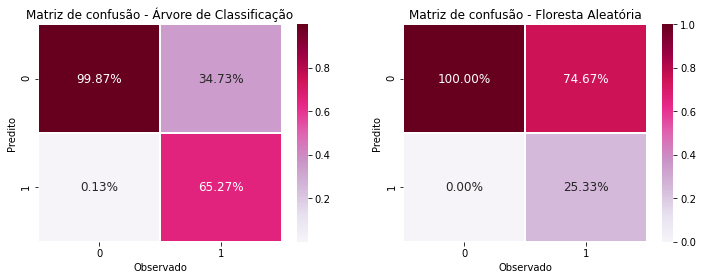

In [18]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix2 = pd.crosstab(y2_pred, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix2/np.sum(confusion_matrix2), fmt='.2%', linewidths=.5, annot = True, cmap='PuRd',annot_kws={"size": 12}, ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix2_rf = pd.crosstab(y2_pred_rf, y2_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix2_rf/np.sum(confusion_matrix2_rf), fmt='.2%', linewidths=.5, annot = True, cmap='PuRd',annot_kws={"size": 12}, ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [19]:
metricas(confusion_matrix2.iloc[1,1], confusion_matrix2.iloc[0,1], confusion_matrix2.iloc[1,0], confusion_matrix2.iloc[0,0])

CAT =  0.997
CAS =  0.653
CAF =  0.999
VPP =  0.769
VPN =  0.002
PVL =  0.006
MCC =  0.707


In [20]:
metricas(confusion_matrix2_rf.iloc[1,1], confusion_matrix2_rf.iloc[0,1], confusion_matrix2_rf.iloc[1,0], confusion_matrix2_rf.iloc[0,0])

CAT =  0.995
CAS =  0.253
CAF =  1.0
VPP =  1.0
VPN =  0.005
PVL =  0.006
MCC =  0.502


### n = 100.000

###### Dividindo a base em treino e teste

In [21]:
np.random.seed(71)
X1_train, X1_test, y1_train, y1_test = train_test_split(data3_100.drop('fraude',axis=1),data3_100['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X1_train.shape,X1_test.shape

((70000, 24), (30000, 24))

#### Árvore de Decisão

In [22]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X1_train,y1_train)

In [23]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X1_train,y1_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   24.6s finished


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=0)

In [24]:
# Melhor modelo encontrado
clf1 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf1 = clf1.fit(X1_train,y1_train)

# Verificando as classificações feitas na base teste
y1_pred = clf1.predict(X1_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


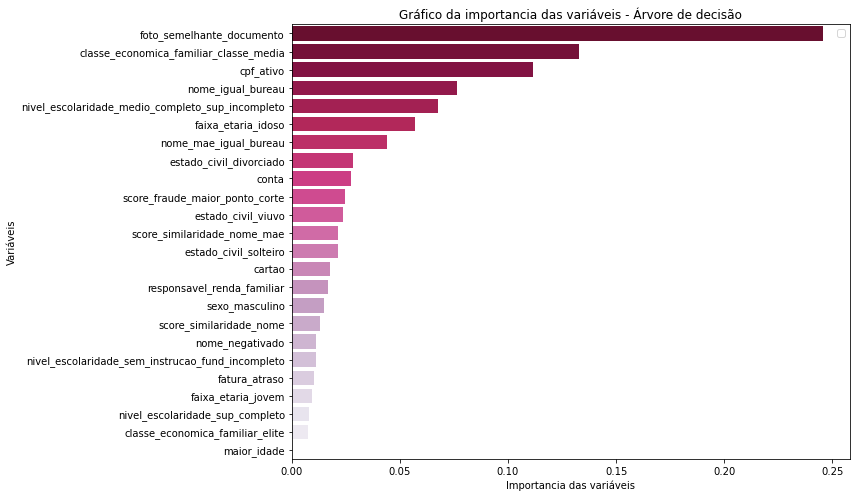

In [25]:
feature_imp = pd.Series(clf1.feature_importances_,index=data3_100.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de decisão")
plt.legend()
plt.show()

#### Floresta Aleatória

In [26]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X1_train,y1_train) 

RandomForestClassifier(random_state=0)

In [27]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X1_train,y1_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.7min finished


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)

In [28]:
# Melhor modelo encontrado
rfc1 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc1 = rfc1.fit(X1_train,y1_train)

# Verificando as classificações feitas na base teste
y1_pred_rf = rfc1.predict(X1_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


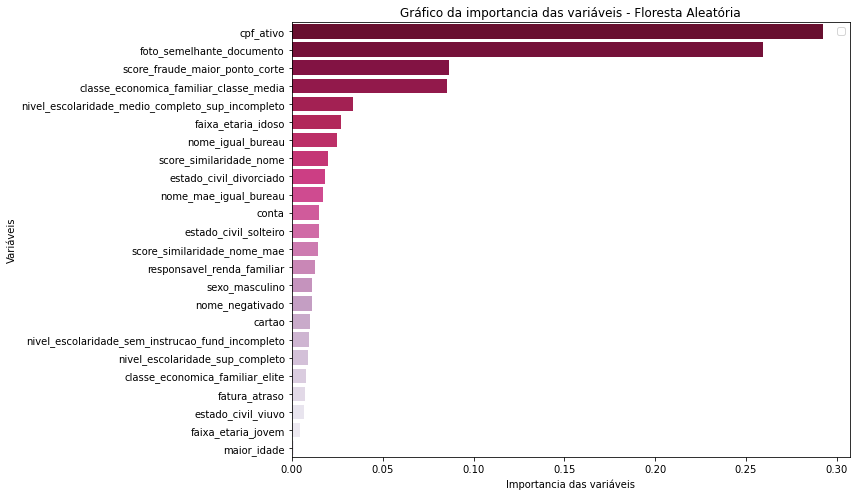

In [29]:
feature_imp = pd.Series(rfc1.feature_importances_,index=data3_100.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta Aleatória")
plt.legend()
plt.show()

#### Comparando as técnicas

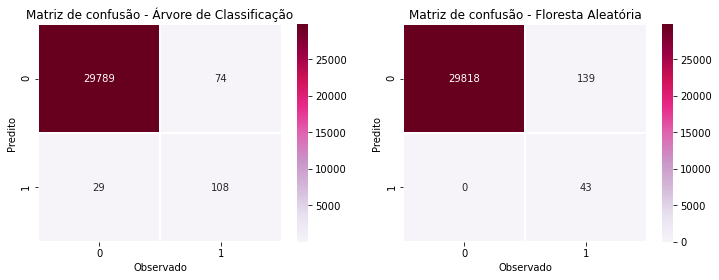

In [30]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix1 = pd.crosstab(y1_pred, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix1, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix1_rf = pd.crosstab(y1_pred_rf, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix1_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

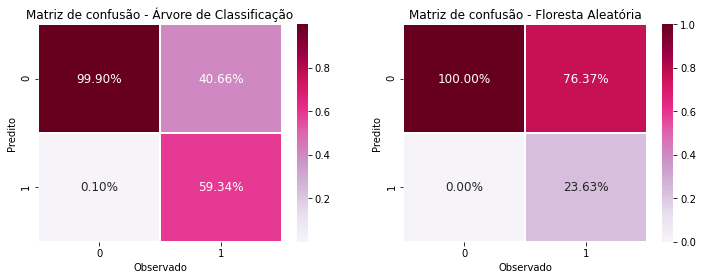

In [31]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix1 = pd.crosstab(y1_pred, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix1/np.sum(confusion_matrix1),fmt='.2%', linewidths=.5, annot = True, cmap='PuRd', annot_kws={"size": 12}, ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix1_rf = pd.crosstab(y1_pred_rf, y1_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix1_rf/np.sum(confusion_matrix1_rf), fmt='.2%', linewidths=.5, annot = True, cmap='PuRd',annot_kws={"size": 12}, ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [32]:
metricas(confusion_matrix1.iloc[1,1], confusion_matrix1.iloc[0,1], confusion_matrix1.iloc[1,0], confusion_matrix1.iloc[0,0])

CAT =  0.997
CAS =  0.593
CAF =  0.999
VPP =  0.788
VPN =  0.002
PVL =  0.006
MCC =  0.682


In [33]:
metricas(confusion_matrix1_rf.iloc[1,1], confusion_matrix1_rf.iloc[0,1], confusion_matrix1_rf.iloc[1,0], confusion_matrix1_rf.iloc[0,0])

CAT =  0.995
CAS =  0.236
CAF =  1.0
VPP =  1.0
VPN =  0.005
PVL =  0.006
MCC =  0.485


### n = 50.000

###### Dividindo a base em treino e teste

In [34]:
np.random.seed(71)
X5_train, X5_test, y5_train, y5_test = train_test_split(data3_50.drop('fraude',axis=1),data3_50['fraude'],test_size=0.3)

# Verificando as formas dos dados:
X5_train.shape,X5_test.shape

((35000, 24), (15000, 24))

#### Árvore de Decisão

In [35]:
# Instânciando o objeto classificador:
tree = DecisionTreeClassifier(random_state=0)

# Treinando o modelo de arvore de decisão:
tree = tree.fit(X5_train,y5_train)

In [36]:
#Encontrando os melhores parâmetros
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         'criterion' :['gini', 'entropy']}

gcv = GridSearchCV(estimator=tree,
                   param_grid=params,
                  verbose=1,
                  n_jobs=-1)
gcv.fit(X5_train,y5_train)

gcv.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   13.2s finished


DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2,
                       random_state=0)

In [37]:
# Melhor modelo encontrado
clf5 = gcv.best_estimator_

# Treinando o modelo de arvore de decisão:
clf5 = clf5.fit(X5_train,y5_train)

# Verificando as classificações feitas na base teste
y5_pred = clf5.predict(X5_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


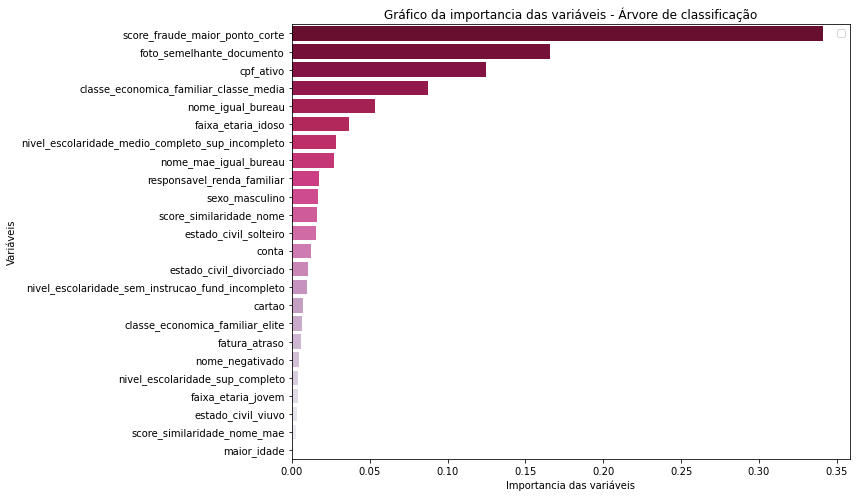

In [38]:
feature_imp = pd.Series(clf5.feature_importances_,index=data3_50.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Árvore de classificação")
plt.legend()
plt.show()

#### Floresta Aleatória

In [39]:
# Instânciando o objeto classificador:
rfc = RandomForestClassifier(random_state=0) 

# Treinando o modelo floresta aleatória 
rfc.fit(X5_train,y5_train) 

RandomForestClassifier(random_state=0)

In [40]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grfc = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=1,
                    n_jobs=-1)
grfc.fit(X5_train,y5_train)

grfc.best_estimator_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.0min finished


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)

In [41]:
# Melhor modelo encontrado
rfc5 = grfc.best_estimator_

# Treinando o modelo de arvore de decisão:
rfc5 = rfc5.fit(X5_train,y5_train)

# Verificando as classificações feitas na base teste
y5_pred_rf = rfc5.predict(X5_test)

###### Variáveis mais importantes

No handles with labels found to put in legend.


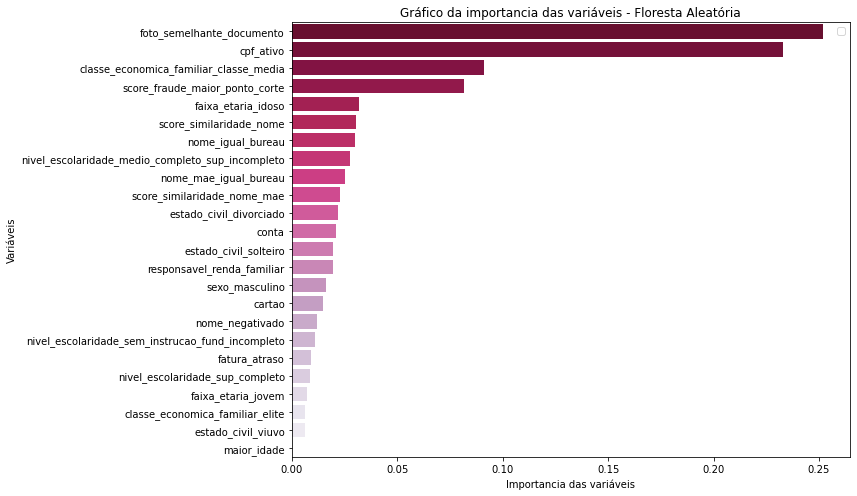

In [42]:
feature_imp = pd.Series(rfc5.feature_importances_,index=data3_50.drop('fraude',axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuRd_r')

# Formatando o gráfico
plt.xlabel('Importancia das variáveis')
plt.ylabel('Variáveis')
plt.title("Gráfico da importancia das variáveis - Floresta Aleatória")
plt.legend()
plt.show()

#### Comparando as técnicas

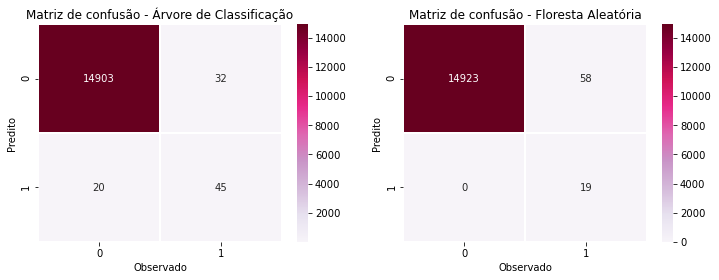

In [43]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix5 = pd.crosstab(y5_pred, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix5, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix5_rf = pd.crosstab(y5_pred_rf, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix5_rf, fmt='', linewidths=.5, annot = True, cmap='PuRd', ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

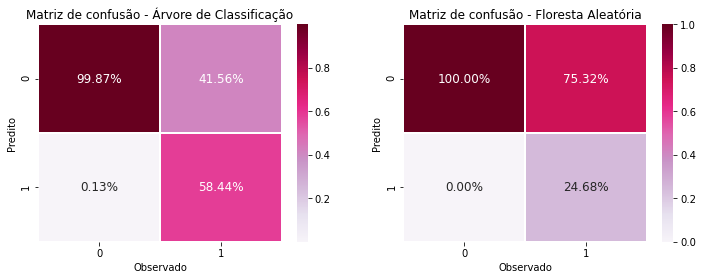

In [44]:
# Matrix de confusão 
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
confusion_matrix5 = pd.crosstab(y5_pred, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g = sns.heatmap(confusion_matrix5/np.sum(confusion_matrix5),fmt='.2%', linewidths=.5, annot = True, cmap='PuRd', annot_kws={"size": 12}, ax = ax1)
g.set(title = "Matriz de confusão - Árvore de Classificação")

ax2 = fig.add_subplot(122)
confusion_matrix5_rf = pd.crosstab(y5_pred_rf, y5_test, rownames = ['Predito'], colnames = ['Observado']) 
g1 = sns.heatmap(confusion_matrix5_rf/np.sum(confusion_matrix5_rf), fmt='.2%', linewidths=.5, annot = True, cmap='PuRd',annot_kws={"size": 12}, ax = ax2)
g1.set(title = "Matriz de confusão - Floresta Aleatória")

plt.show ()

In [45]:
metricas(confusion_matrix5.iloc[1,1], confusion_matrix5.iloc[0,1], confusion_matrix5.iloc[1,0], confusion_matrix5.iloc[0,0])

CAT =  0.997
CAS =  0.584
CAF =  0.999
VPP =  0.692
VPN =  0.002
PVL =  0.005
MCC =  0.634


In [46]:
metricas(confusion_matrix5_rf.iloc[1,1], confusion_matrix5_rf.iloc[0,1], confusion_matrix5_rf.iloc[1,0], confusion_matrix5_rf.iloc[0,0])

CAT =  0.996
CAS =  0.247
CAF =  1.0
VPP =  1.0
VPN =  0.004
PVL =  0.005
MCC =  0.496
